|key|Value|
|---|-----|
|Assignment|Midterm|
|Auther|Matthew Lorbeski|
|Date|05-27-2024|

### The purpose of this assignment is to show the quality of data analysis work I can do. I will be researching movies from the year 2006 and explain that there is correlation to how much money is spent on the movie (budget) to how much the movie made (gross sales), it will also be broken down by sentiment of positive, negative, and neutral.


### I will retrieve one year's worth of movie data from MongoDB, from both my IMDB and Metacritic data collections. I will merge both together to make a combined dataset and use machine learning analysis for sentiment. Charts will be displayed to visualize the data.



##### Creating the data pipeline by linking to my stored json file with my credentials for MongoDB.
###### Code format from T.Spence

In [1]:
import json

with open('/Users/matthew/Desktop/Bellevue_College/Spring24/Data320/secrets.json') as f:
    data = json.load(f)

    secret_key = data['mongodb']

print(f"My secret key is {len(secret_key)} characters in length.")

print('MongoDB user information loaded.')

My secret key is 72 characters in length.
MongoDB user information loaded.


##### Connection to MongoDB and showing what databases and collections are found. 
###### Code format from T.Spence

In [2]:
import pymongo
import certifi

# Connect to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())
print(f"Using MongoDB version {client.server_info()['version']}.")

# Check what databases exist on this server
all_databases = client.list_database_names()
print(f"This MongoDB server has the databases {all_databases}")

my_database = client['DATA_320']

# Here is the list of collections within my database
all_collections = my_database.list_collection_names()
print(f"This database has the collections {all_collections}")

Using MongoDB version 7.0.8.
This MongoDB server has the databases ['DATA_320', 'admin', 'local']
This database has the collections ['imdb', 'IMDB_FIXED', 'METACRITIC', 'IMDB Year 2006']


##### First working with the data from the Metacritic collection and putting it into a dataframe. 
###### Code format from T.Spence

In [3]:
import pandas as pd
import re

# Retrieve all records from a collection 
cursor = my_database["METACRITIC"].find()

# Convert this information into a Pandas dataframe
metacritic = pd.DataFrame(cursor)

metacritic.head()

,_id,movie_id,title,release_date,description,score,thumbnail
0,662ec26e80d4c5d1f3c23186,11254,Spring Forward,"December 1, 2000","Upon release from prison, a young man (Schreib...",79,https://static.metacritic.com/images/products/...
1,662ec26e80d4c5d1f3c23189,11257,High Fidelity,"March 31, 2000","In this biting romantic comedy, Rob Gordon (Cu...",79,https://static.metacritic.com/images/products/...
2,662ec26e80d4c5d1f3c23174,11236,Beau Travail,"March 31, 2000",The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...
3,662ec26e80d4c5d1f3c23198,11272,Ratcatcher,"October 13, 2000",The story of a twelve year old boy (Eadie) liv...,76,https://static.metacritic.com/images/products/...
4,662ec26e80d4c5d1f3c2317f,11247,One Day in September,"November 17, 2000",This documentary examines the events surroundi...,82,https://static.metacritic.com/images/products/...


##### Making sure I only get movies from the year 2006 and coverting them to datetime format. I'm also dropping columns what won't be needed for analysis. 

In [4]:
query = {"release_date": re.compile("2006")}

meta = my_database["METACRITIC"].find(query)

meta = pd.DataFrame(meta)

# Convert the release_date to a datetime format
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

meta = meta.drop(columns=['_id', 'movie_id', 'thumbnail'])

meta.head(10)

,title,release_date,description,score
0,Borat: Cultural Learnings of America for Make ...,2006-11-03,The movie film is a government assigned projec...,89
1,The Fallen Idol (re-release),2006-02-10,"Adapted from Graham Greene's story ""The Baseme...",88
2,Venus,2006-12-21,An aging English actor finds his life changed ...,82
3,Chats perchés,2006-12-20,"In his newest film, French documentarian and c...",79
4,Duck Season,2006-03-10,An unlikely foursome stumble upon little revel...,74
5,Who the #$&% Is Jackson Pollock?,2006-11-15,"When Teri Horton, a 73-year-old former long-ha...",70
6,Fan-Fan the Tulip,2006-07-21,This stylish swashbuckler French comedy was or...,69
7,Awesome; I Fuckin' Shot That!,2006-03-31,"A formally innovative feature film experience,...",68
8,Been Rich All My Life,2006-07-21,This documentary follows the unlikeliest troup...,67
9,Once in a Lifetime: The Extraordinary Story of...,2006-07-07,It was 1977 and one of New York’s most tumultu...,67


##### Now working with the data from the IMBD Year 2006 collection and putting it into a dataframe. 
###### Code format from T.Spence

In [5]:
# Retrieve all records from a collection
cursor = my_database["IMDB Year 2006"].find()

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

imdb.head()

,_id,budget,cast,certification,company,director,genres,gross_sales,id,opening_weekend,...,votes,Budget_USD,Gross_Sales_USD,Opening_Weekend_USD,Runtime_minutes,User_Rating_num,Votes_num,Release_Year,Release_Month,MPAA_Rating
0,6366e494fcbf171967d87a2d,"$54,000,000 (estimated)","Gene Hackman, Christopher Reeve, Marlon Brando...",PG,Warner Bros.,"Richard Donner, Richard Lester","Action, Adventure, Romance, Sci-Fi",None,839995,None,...,17220,54000000.0,NaN,NaN,116,7.6,17220,2006,11,PG
1,636ad13ed62a76b6b8c67674,None,"Julie Strain, Rodrigo Obregón, Julie K. Smith,...",R,"Malibu Bay Films, Skyhawks Films",Andy Sidaris,"Action, Adventure",None,127759,None,...,1388,NaN,NaN,NaN,98,3.7,1388,2006,2,R
2,6371522e3bc31743d94b5964,"$45,000,000 (estimated)","Denzel Washington, Clive Owen, Jodie Foster, C...","TV-14::(DLV, TV Rating.), R","Universal Pictures, Imagine Entertainment, 40 ...",Spike Lee,"Crime, Drama, Mystery, Thriller","$184,376,254",454848,"$28,954,945, 26 Mar 2006",...,373828,45000000.0,184376254.0,28954945.0,129,7.6,373828,2006,3,R
3,637152313bc31743d94b5965,"EUR13,500,000 (estimated)","Ivana Baquero, Sergi López, Maribel Verdú, Dou...","TV-14, R","Tequila Gang, Estudios Picasso, Esperanto Film...",Guillermo del Toro,"Drama, Fantasy, War","$87,041,569",457430,None,...,667941,NaN,87041569.0,NaN,118,8.2,667941,2006,5,R
4,637152343bc31743d94b5966,"$90,000,000 (estimated)","Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",R,"Warner Bros., Plan B Entertainment, Initial En...",Martin Scorsese,"Crime, Drama, Thriller","$289,847,354",407887,"$26,887,467, 08 Oct 2006",...,1317682,90000000.0,289847354.0,26887467.0,151,8.5,1317682,2006,9,R


##### Cleaning the data by dropping columns that aren't needed and dropping all NaN values.
###### Function from Andrew McDaniel

In [6]:
imdb = imdb.drop(columns=['_id', 'id'])

def cleanse_df(df, cols=[]):
    df = df.dropna(subset=cols) 
    return df

imdb = cleanse_df(imdb, ['runtime', 'budget' ])

imdb.head(10)

,budget,cast,certification,company,director,genres,gross_sales,opening_weekend,producer,release_date,...,votes,Budget_USD,Gross_Sales_USD,Opening_Weekend_USD,Runtime_minutes,User_Rating_num,Votes_num,Release_Year,Release_Month,MPAA_Rating
0,"$54,000,000 (estimated)","Gene Hackman, Christopher Reeve, Marlon Brando...",PG,Warner Bros.,"Richard Donner, Richard Lester","Action, Adventure, Romance, Sci-Fi",None,None,"Derek Hoffman, Ilya Salkind, Pierre Spengler, ...",2006-11-02,...,17220,54000000.0,NaN,NaN,116,7.6,17220,2006,11,PG
2,"$45,000,000 (estimated)","Denzel Washington, Clive Owen, Jodie Foster, C...","TV-14::(DLV, TV Rating.), R","Universal Pictures, Imagine Entertainment, 40 ...",Spike Lee,"Crime, Drama, Mystery, Thriller","$184,376,254","$28,954,945, 26 Mar 2006","Jonathan Filley, Brian Grazer, Karen Kehela Sh...",2006-03-16,...,373828,45000000.0,184376254.0,28954945.0,129,7.6,373828,2006,3,R
3,"EUR13,500,000 (estimated)","Ivana Baquero, Sergi López, Maribel Verdú, Dou...","TV-14, R","Tequila Gang, Estudios Picasso, Esperanto Film...",Guillermo del Toro,"Drama, Fantasy, War","$87,041,569",None,"Víctor Albarrán, Belén Atienza, Álvaro Augusti...",2006-05-27,...,667941,NaN,87041569.0,NaN,118,8.2,667941,2006,5,R
4,"$90,000,000 (estimated)","Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",R,"Warner Bros., Plan B Entertainment, Initial En...",Martin Scorsese,"Crime, Drama, Thriller","$289,847,354","$26,887,467, 08 Oct 2006","Michael Aguilar, G. Mac Brown, Doug Davison, B...",2006-09-26,...,1317682,90000000.0,289847354.0,26887467.0,151,8.5,1317682,2006,9,R
5,"$50,000,000 (estimated)","Radha Mitchell, Sean Bean, Laurie Holden, Debo...",R,"TriStar Pictures, Silent Hill DCP Inc., Davis-...",Christophe Gans,"Horror, Mystery","$97,607,453, 13 May 2018",None,"Nicolas Boukhrief, Don Carmody, Samuel Hadida,...",2006-04-20,...,231642,50000000.0,97607453.0,NaN,125,6.5,231642,2006,4,R
6,"$40,000,000 (estimated)","Hugh Jackman, Christian Bale, Michael Caine, P...",PG-13,"Touchstone Pictures, Warner Bros. Pictures Gro...",Christopher Nolan,"Drama, Mystery, Sci-Fi, Thriller","$109,676,311, 08 Feb 2007",None,"Christopher Ball, Valerie Dean, Jordan Goldber...",2006-10-17,...,1325463,40000000.0,109676311.0,NaN,130,8.5,1325463,2006,10,PG-13
7,"$75,000,000 (estimated)","Ryan Whitney, Steve Buscemi, Mitchel Musso, Ca...","TV-Y7-FV, TV-PG::(V), PG","Columbia Pictures, Relativity Media, ImageMove...",Gil Kenan,"Animation, Comedy, Family, Fantasy, Mystery","$66,513,996","$22,217,226, 23 Jul 2006","Jason Clark, Heather Kelton, Jack Rapke, Benne...",2006-06-15,...,121867,75000000.0,66513996.0,22217226.0,91,6.6,121867,2006,6,PG
8,"$65,000,000 (estimated)","Gerard Butler, Lena Headey, Dominic West, Davi...",R,"Warner Bros., Legendary Entertainment, Virtual...",Zack Snyder,"Action, Drama","$456,068,181","$70,885,301, 11 Mar 2007","Steve Barnett, Mark Canton, Wesley Coller, Wil...",2006-12-09,...,819270,65000000.0,456068181.0,70885301.0,117,7.6,819270,2006,12,R
9,"$15,000,000 (estimated)","Maxime Giffard, Michael Bailey Smith, Tom Bowe...","R, Unrated","Craven-Maddalena Films, Dune Entertainment, Ma...",Alexandre Aja,"Horror, Thriller","$70,355,813","$15,708,512, 12 Mar 2006","Wes Craven, Frank Hildebrand, Samy Layani, Ini...",2006-03-10,...,172809,15000000.0,70355813.0,15708512.0,107,6.4,172809,2006,3,R
10,"$150,000,000 (estimated)","Daniel Craig, Eva Green, Mads Mikkelsen, Judi ...",PG-13,"Columbia Pictures, Eon Productions, Casino Roy...",Martin Campbell,"Action, Adventure, Thriller","$599,045,960, 09 Nov 2013",None,"Barbara Broccoli, Guido Cerasuolo, Callum McDo...",2006-11-14,...,656861,150000000.0,599045960.0,NaN,144,8.0,656861,2006,11,PG-13


##### Converting data types for an easier data analysis and continued data cleaning.

In [7]:

# Convert the release_date to a datetime format
imdb.release_date = pd.to_datetime(imdb.release_date, errors='coerce')
imdb.runtime = pd.to_numeric(imdb.runtime, errors='coerce')

imdb = imdb.drop(columns=['budget', 'gross_sales', 'opening_weekend'])

imdb.head(10)

,cast,certification,company,director,genres,producer,release_date,runtime,title,user_rating,votes,Budget_USD,Gross_Sales_USD,Opening_Weekend_USD,Runtime_minutes,User_Rating_num,Votes_num,Release_Year,Release_Month,MPAA_Rating
0,"Gene Hackman, Christopher Reeve, Marlon Brando...",PG,Warner Bros.,"Richard Donner, Richard Lester","Action, Adventure, Romance, Sci-Fi","Derek Hoffman, Ilya Salkind, Pierre Spengler, ...",2006-11-02,116,Superman II: The Richard Donner Cut,7.6,17220,54000000.0,NaN,NaN,116,7.6,17220,2006,11,PG
2,"Denzel Washington, Clive Owen, Jodie Foster, C...","TV-14::(DLV, TV Rating.), R","Universal Pictures, Imagine Entertainment, 40 ...",Spike Lee,"Crime, Drama, Mystery, Thriller","Jonathan Filley, Brian Grazer, Karen Kehela Sh...",2006-03-16,129,Inside Man,7.6,373828,45000000.0,184376254.0,28954945.0,129,7.6,373828,2006,3,R
3,"Ivana Baquero, Sergi López, Maribel Verdú, Dou...","TV-14, R","Tequila Gang, Estudios Picasso, Esperanto Film...",Guillermo del Toro,"Drama, Fantasy, War","Víctor Albarrán, Belén Atienza, Álvaro Augusti...",2006-05-27,118,Pan's Labyrinth,8.2,667941,NaN,87041569.0,NaN,118,8.2,667941,2006,5,R
4,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",R,"Warner Bros., Plan B Entertainment, Initial En...",Martin Scorsese,"Crime, Drama, Thriller","Michael Aguilar, G. Mac Brown, Doug Davison, B...",2006-09-26,151,The Departed,8.5,1317682,90000000.0,289847354.0,26887467.0,151,8.5,1317682,2006,9,R
5,"Radha Mitchell, Sean Bean, Laurie Holden, Debo...",R,"TriStar Pictures, Silent Hill DCP Inc., Davis-...",Christophe Gans,"Horror, Mystery","Nicolas Boukhrief, Don Carmody, Samuel Hadida,...",2006-04-20,125,Silent Hill,6.5,231642,50000000.0,97607453.0,NaN,125,6.5,231642,2006,4,R
6,"Hugh Jackman, Christian Bale, Michael Caine, P...",PG-13,"Touchstone Pictures, Warner Bros. Pictures Gro...",Christopher Nolan,"Drama, Mystery, Sci-Fi, Thriller","Christopher Ball, Valerie Dean, Jordan Goldber...",2006-10-17,130,The Prestige,8.5,1325463,40000000.0,109676311.0,NaN,130,8.5,1325463,2006,10,PG-13
7,"Ryan Whitney, Steve Buscemi, Mitchel Musso, Ca...","TV-Y7-FV, TV-PG::(V), PG","Columbia Pictures, Relativity Media, ImageMove...",Gil Kenan,"Animation, Comedy, Family, Fantasy, Mystery","Jason Clark, Heather Kelton, Jack Rapke, Benne...",2006-06-15,91,Monster House,6.6,121867,75000000.0,66513996.0,22217226.0,91,6.6,121867,2006,6,PG
8,"Gerard Butler, Lena Headey, Dominic West, Davi...",R,"Warner Bros., Legendary Entertainment, Virtual...",Zack Snyder,"Action, Drama","Steve Barnett, Mark Canton, Wesley Coller, Wil...",2006-12-09,117,300,7.6,819270,65000000.0,456068181.0,70885301.0,117,7.6,819270,2006,12,R
9,"Maxime Giffard, Michael Bailey Smith, Tom Bowe...","R, Unrated","Craven-Maddalena Films, Dune Entertainment, Ma...",Alexandre Aja,"Horror, Thriller","Wes Craven, Frank Hildebrand, Samy Layani, Ini...",2006-03-10,107,The Hills Have Eyes,6.4,172809,15000000.0,70355813.0,15708512.0,107,6.4,172809,2006,3,R
10,"Daniel Craig, Eva Green, Mads Mikkelsen, Judi ...",PG-13,"Columbia Pictures, Eon Productions, Casino Roy...",Martin Campbell,"Action, Adventure, Thriller","Barbara Broccoli, Guido Cerasuolo, Callum McDo...",2006-11-14,144,Casino Royale,8.0,656861,150000000.0,599045960.0,NaN,144,8.0,656861,2006,11,PG-13


##### Merging the two dataframes, Metacritic and IMDB by movie title name. 

In [8]:
# Merge the two dataframes

merged = pd.merge(meta, imdb, on='title', how='inner')

In [9]:
merged.head(10)

,title,release_date_x,description,score,cast,certification,company,director,genres,producer,...,votes,Budget_USD,Gross_Sales_USD,Opening_Weekend_USD,Runtime_minutes,User_Rating_num,Votes_num,Release_Year,Release_Month,MPAA_Rating
0,Venus,2006-12-21,An aging English actor finds his life changed ...,82,"Peter O'Toole, Leslie Phillips, Beatrice Savor...",R,"Miramax, FilmFour, UK Film Council, Free Range...",Roger Michell,"Comedy, Drama, Romance","Miles Ketley, Kevin Loader, Charles Moore, Ros...",...,13096,NaN,NaN,NaN,95,7.1,13096,2006,9,R
1,Once in a Lifetime: The Extraordinary Story of...,2006-07-07,It was 1977 and one of New York’s most tumultu...,67,"Ahmet Ertegun, Nesuhi Ertegün, Matt Dillon, Cl...",PG-13,"Passion Pictures, Cactus Three, ESPN Original ...","Paul Crowder, John Dower","Documentary, Sport","John Battsek, Vicki Cherkas, Michael Davies, J...",...,1502,1000000.0,NaN,NaN,97,7.3,1502,2006,5,PG-13
2,Superman Returns,2006-06-28,"Five years after his mysterious disappearance,...",72,"Brandon Routh, Kate Bosworth, Kevin Spacey, Ja...","TV-PG::(TV rating), PG-13","Warner Bros., Legendary Entertainment, Peters ...",Bryan Singer,"Action, Adventure, Sci-Fi","Gilbert Adler, William Fay, Stephen Jones, Chr...",...,283943,209000000.0,191000000.0,52535096.0,154,6.1,283943,2006,6,PG-13
3,World Trade Center,2006-08-09,"September 11, 2001 was an unusually warm day i...",66,"Nicolas Cage, Maria Bello, Connor Paolo, Antho...",PG-13,"Paramount Pictures, Double Feature Films, Inte...",Oliver Stone,"Drama, History, Thriller","Moritz Borman, Robert S. Costanzo, Chantal Feg...",...,84362,63000000.0,162970240.0,NaN,129,6.0,84362,2006,8,PG-13
4,Find Me Guilty,2006-03-17,This film is based on the true story of Giacom...,65,"Vin Diesel, Alex Rocco, Frank Pietrangolare, R...",R,"Yari Film Group Releasing, Bob Yari Production...",Sidney Lumet,"Biography, Comedy, Crime, Drama","Rita Branch, Bob DeBrino, Frank Digiacomo, Rob...",...,34840,13000000.0,2636637.0,NaN,125,7.0,34840,2006,2,R
5,Dreamgirls,2006-12-15,Twenty-five years after bringing Broadway audi...,76,"Jamie Foxx, Beyoncé, Eddie Murphy, Danny Glove...","Unrated::(Director's Extended Edition), PG-13","Dreamworks Pictures, Paramount Pictures, Laure...",Bill Condon,"Drama, Music, Musical","Jonathan King, Laurence Mark, Leeann Stonebrea...",...,74285,70000000.0,154937680.0,378950.0,130,6.6,74285,2006,5,PG-13
6,Slither,2006-03-31,Slither is an edgy blend of heart-stopping ter...,69,"Don Thompson, Nathan Fillion, Gregg Henry, Xan...",R,"Gold Circle Films, Strike Entertainment, Brigh...",James Gunn,"Comedy, Horror, Sci-Fi","Marc Abraham, Thomas A. Bliss, Paul Brooks, Je...",...,83129,15500000.0,NaN,3880270.0,95,6.5,83129,2006,3,R
7,The Illusionist,2006-08-18,"Set in turn-of-the-centuy Vienna, this superna...",68,"Edward Norton, Paul Giamatti, Jessica Biel, Ru...",PG-13,"Bull's Eye Entertainment, Bob Yari Productions...",Neil Burger,"Drama, Fantasy, Mystery, Romance, Thriller","Jane Garnett, Phillip Glasser, Joey Horvitz, T...",...,373434,16000000.0,87892388.0,927956.0,110,7.6,373434,2006,1,PG-13
8,Iraq for Sale: The War Profiteers,2006-09-08,Director Robert Greenwald takes you inside the...,68,"Katy Helvenston-Wettengal, Scott Helvenston, D...",Not Rated,Brave New Films,Robert Greenwald,"Documentary, War","Ellen Brodsky, Matthew Brown, Kerry Candaele, ...",...,1641,750000.0,NaN,NaN,75,7.6,1641,2006,9,NaN
9,Eight Below,2006-02-17,"Inspired by a true story, Eight Below is an ex...",64,"Paul Walker, Bruce Greenwood, Moon Bloodgood, ...",PG,"Walt Disney Pictures, Spyglass Entertainment, ...",Frank Marshall,"Adventure, Drama, Family","Gary Barber, Roger Birnbaum, Patrick Crowley, ...",...,65319,40000000.0,120455994.0,24968601.0,120,7.3,65319,2006,2,PG


##### Looking at the count in each column to see if more data cleaning needs to be done. 

In [10]:
merged.count()

title                  192
release_date_x         192
description            192
score                  192
cast                   192
certification          191
company                192
director               192
genres                 192
producer               192
release_date_y         192
runtime                192
user_rating            192
votes                  192
Budget_USD             181
Gross_Sales_USD        116
Opening_Weekend_USD    145
Runtime_minutes        192
User_Rating_num        192
Votes_num              192
Release_Year           192
Release_Month          192
MPAA_Rating            185
dtype: int64

##### Cleaning the combined dataframe by dropping columns that won't be needed for this data analysis.

In [11]:
merged = merged.drop(columns=['cast','company','director','producer','runtime', 'release_date_x', 'user_rating', 'votes'])


In [12]:
merged.head(10)

,title,description,score,certification,genres,release_date_y,Budget_USD,Gross_Sales_USD,Opening_Weekend_USD,Runtime_minutes,User_Rating_num,Votes_num,Release_Year,Release_Month,MPAA_Rating
0,Venus,An aging English actor finds his life changed ...,82,R,"Comedy, Drama, Romance",2006-09-02,NaN,NaN,NaN,95,7.1,13096,2006,9,R
1,Once in a Lifetime: The Extraordinary Story of...,It was 1977 and one of New York’s most tumultu...,67,PG-13,"Documentary, Sport",2006-05-19,1000000.0,NaN,NaN,97,7.3,1502,2006,5,PG-13
2,Superman Returns,"Five years after his mysterious disappearance,...",72,"TV-PG::(TV rating), PG-13","Action, Adventure, Sci-Fi",2006-06-21,209000000.0,191000000.0,52535096.0,154,6.1,283943,2006,6,PG-13
3,World Trade Center,"September 11, 2001 was an unusually warm day i...",66,PG-13,"Drama, History, Thriller",2006-08-09,63000000.0,162970240.0,NaN,129,6.0,84362,2006,8,PG-13
4,Find Me Guilty,This film is based on the true story of Giacom...,65,R,"Biography, Comedy, Crime, Drama",2006-02-16,13000000.0,2636637.0,NaN,125,7.0,34840,2006,2,R
5,Dreamgirls,Twenty-five years after bringing Broadway audi...,76,"Unrated::(Director's Extended Edition), PG-13","Drama, Music, Musical",2006-05-19,70000000.0,154937680.0,378950.0,130,6.6,74285,2006,5,PG-13
6,Slither,Slither is an edgy blend of heart-stopping ter...,69,R,"Comedy, Horror, Sci-Fi",2006-03-31,15500000.0,NaN,3880270.0,95,6.5,83129,2006,3,R
7,The Illusionist,"Set in turn-of-the-centuy Vienna, this superna...",68,PG-13,"Drama, Fantasy, Mystery, Romance, Thriller",2006-01-22,16000000.0,87892388.0,927956.0,110,7.6,373434,2006,1,PG-13
8,Iraq for Sale: The War Profiteers,Director Robert Greenwald takes you inside the...,68,Not Rated,"Documentary, War",2006-09-01,750000.0,NaN,NaN,75,7.6,1641,2006,9,NaN
9,Eight Below,"Inspired by a true story, Eight Below is an ex...",64,PG,"Adventure, Drama, Family",2006-02-17,40000000.0,120455994.0,24968601.0,120,7.3,65319,2006,2,PG


##### Filling in values of movies that aren't rated with "Not Rated" instead of NaN.

In [13]:
merged['MPAA_Rating'] = merged['MPAA_Rating'].fillna('Not Rated')

merged.head(10)

,title,description,score,certification,genres,release_date_y,Budget_USD,Gross_Sales_USD,Opening_Weekend_USD,Runtime_minutes,User_Rating_num,Votes_num,Release_Year,Release_Month,MPAA_Rating
0,Venus,An aging English actor finds his life changed ...,82,R,"Comedy, Drama, Romance",2006-09-02,NaN,NaN,NaN,95,7.1,13096,2006,9,R
1,Once in a Lifetime: The Extraordinary Story of...,It was 1977 and one of New York’s most tumultu...,67,PG-13,"Documentary, Sport",2006-05-19,1000000.0,NaN,NaN,97,7.3,1502,2006,5,PG-13
2,Superman Returns,"Five years after his mysterious disappearance,...",72,"TV-PG::(TV rating), PG-13","Action, Adventure, Sci-Fi",2006-06-21,209000000.0,191000000.0,52535096.0,154,6.1,283943,2006,6,PG-13
3,World Trade Center,"September 11, 2001 was an unusually warm day i...",66,PG-13,"Drama, History, Thriller",2006-08-09,63000000.0,162970240.0,NaN,129,6.0,84362,2006,8,PG-13
4,Find Me Guilty,This film is based on the true story of Giacom...,65,R,"Biography, Comedy, Crime, Drama",2006-02-16,13000000.0,2636637.0,NaN,125,7.0,34840,2006,2,R
5,Dreamgirls,Twenty-five years after bringing Broadway audi...,76,"Unrated::(Director's Extended Edition), PG-13","Drama, Music, Musical",2006-05-19,70000000.0,154937680.0,378950.0,130,6.6,74285,2006,5,PG-13
6,Slither,Slither is an edgy blend of heart-stopping ter...,69,R,"Comedy, Horror, Sci-Fi",2006-03-31,15500000.0,NaN,3880270.0,95,6.5,83129,2006,3,R
7,The Illusionist,"Set in turn-of-the-centuy Vienna, this superna...",68,PG-13,"Drama, Fantasy, Mystery, Romance, Thriller",2006-01-22,16000000.0,87892388.0,927956.0,110,7.6,373434,2006,1,PG-13
8,Iraq for Sale: The War Profiteers,Director Robert Greenwald takes you inside the...,68,Not Rated,"Documentary, War",2006-09-01,750000.0,NaN,NaN,75,7.6,1641,2006,9,Not Rated
9,Eight Below,"Inspired by a true story, Eight Below is an ex...",64,PG,"Adventure, Drama, Family",2006-02-17,40000000.0,120455994.0,24968601.0,120,7.3,65319,2006,2,PG


##### Inspecting the counts for further information to see if more data cleaning is needed.

In [14]:
merged.count()

title                  192
description            192
score                  192
certification          191
genres                 192
release_date_y         192
Budget_USD             181
Gross_Sales_USD        116
Opening_Weekend_USD    145
Runtime_minutes        192
User_Rating_num        192
Votes_num              192
Release_Year           192
Release_Month          192
MPAA_Rating            192
dtype: int64

##### Dropping NaN values for easier analysis and checking dataframe count to ensure all equal.

In [15]:
merged = merged.dropna(subset=['Gross_Sales_USD', 'Opening_Weekend_USD'])

merged.count()

title                  91
description            91
score                  91
certification          91
genres                 91
release_date_y         91
Budget_USD             91
Gross_Sales_USD        91
Opening_Weekend_USD    91
Runtime_minutes        91
User_Rating_num        91
Votes_num              91
Release_Year           91
Release_Month          91
MPAA_Rating            91
dtype: int64

##### Final look at the dataframe to make sure there is no futher cleaning needed.

In [16]:
merged.head(10)
 

,title,description,score,certification,genres,release_date_y,Budget_USD,Gross_Sales_USD,Opening_Weekend_USD,Runtime_minutes,User_Rating_num,Votes_num,Release_Year,Release_Month,MPAA_Rating
2,Superman Returns,"Five years after his mysterious disappearance,...",72,"TV-PG::(TV rating), PG-13","Action, Adventure, Sci-Fi",2006-06-21,209000000.0,191000000.0,52535096.0,154,6.1,283943,2006,6,PG-13
5,Dreamgirls,Twenty-five years after bringing Broadway audi...,76,"Unrated::(Director's Extended Edition), PG-13","Drama, Music, Musical",2006-05-19,70000000.0,154937680.0,378950.0,130,6.6,74285,2006,5,PG-13
7,The Illusionist,"Set in turn-of-the-centuy Vienna, this superna...",68,PG-13,"Drama, Fantasy, Mystery, Romance, Thriller",2006-01-22,16000000.0,87892388.0,927956.0,110,7.6,373434,2006,1,PG-13
9,Eight Below,"Inspired by a true story, Eight Below is an ex...",64,PG,"Adventure, Drama, Family",2006-02-17,40000000.0,120455994.0,24968601.0,120,7.3,65319,2006,2,PG
11,Children of Men,Children of Men envisages a world one generati...,84,R,"Action, Drama, Sci-Fi, Thriller",2006-09-03,76000000.0,69959751.0,179268.0,109,7.9,500727,2006,9,R
12,Who Killed the Electric Car?,This documentary chronicles the life and myste...,70,PG,Documentary,2006-01-23,1000000.0,1222746.0,45138.0,92,7.6,12575,2006,1,PG
13,Babel,"In the remote sands of the Moroccan desert, a ...",69,R,Drama,2006-05-23,25000000.0,135330182.0,389351.0,143,7.5,303856,2006,5,R
15,Rocky Balboa,Former heavyweight champion Rocky Balboa steps...,63,"TV-PG, PG","Action, Drama, Sport",2006-12-13,24000000.0,155721132.0,17003904.0,102,7.1,217402,2006,12,PG
16,The Good Shepherd,The tumultuous early history of the Central In...,61,"TV-14::(DLSV, TV Rating.), R","Drama, History, Thriller",2006-12-11,110000000.0,99480480.0,14142760.0,167,6.7,104067,2006,12,R
17,Inside Man,The perfect bank robbery quickly spirals into ...,76,"TV-14::(DLV, TV Rating.), R","Crime, Drama, Mystery, Thriller",2006-03-16,45000000.0,184376254.0,28954945.0,129,7.6,373828,2006,3,R


##### Running regression analysis to test corrilation between Budget and Gross Sales.
###### Code format from Akhil Sistla

In [17]:
import statsmodels.formula.api as smf

regression_budget_sales = smf.ols('Budget_USD ~ Gross_Sales_USD', data=merged).fit()

print(regression_budget_sales.summary())

                            OLS Regression Results                            
Dep. Variable:             Budget_USD   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     94.01
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.36e-15
Time:                        17:49:13   Log-Likelihood:                -1700.6
No. Observations:                  91   AIC:                             3405.
Df Residuals:                      89   BIC:                             3410.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.488e+07   4.38e+06     

##### Installing libraries used.

In [18]:
#%pip install torch torchvision torchaudio

#%pip install transformers
#%pip install torch torchvision torchaudio
#%pip install sentencepiece

#%pip install matplotlib seaborn

#%pip install protobuf


##### Importing libraries for data visualization.

In [19]:
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns



##### Adding a column to the merged dataframe with the sentiment analysis rating.
###### Code format from Akhil Sistla

In [20]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model='cardiffnlp/twitter-xlm-roberta-base-sentiment')

merged['sentiment'] = merged['description'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
merged.head(10)

,title,description,score,certification,genres,release_date_y,Budget_USD,Gross_Sales_USD,Opening_Weekend_USD,Runtime_minutes,User_Rating_num,Votes_num,Release_Year,Release_Month,MPAA_Rating,sentiment
2,Superman Returns,"Five years after his mysterious disappearance,...",72,"TV-PG::(TV rating), PG-13","Action, Adventure, Sci-Fi",2006-06-21,209000000.0,191000000.0,52535096.0,154,6.1,283943,2006,6,PG-13,neutral
5,Dreamgirls,Twenty-five years after bringing Broadway audi...,76,"Unrated::(Director's Extended Edition), PG-13","Drama, Music, Musical",2006-05-19,70000000.0,154937680.0,378950.0,130,6.6,74285,2006,5,PG-13,positive
7,The Illusionist,"Set in turn-of-the-centuy Vienna, this superna...",68,PG-13,"Drama, Fantasy, Mystery, Romance, Thriller",2006-01-22,16000000.0,87892388.0,927956.0,110,7.6,373434,2006,1,PG-13,neutral
9,Eight Below,"Inspired by a true story, Eight Below is an ex...",64,PG,"Adventure, Drama, Family",2006-02-17,40000000.0,120455994.0,24968601.0,120,7.3,65319,2006,2,PG,positive
11,Children of Men,Children of Men envisages a world one generati...,84,R,"Action, Drama, Sci-Fi, Thriller",2006-09-03,76000000.0,69959751.0,179268.0,109,7.9,500727,2006,9,R,negative
12,Who Killed the Electric Car?,This documentary chronicles the life and myste...,70,PG,Documentary,2006-01-23,1000000.0,1222746.0,45138.0,92,7.6,12575,2006,1,PG,negative
13,Babel,"In the remote sands of the Moroccan desert, a ...",69,R,Drama,2006-05-23,25000000.0,135330182.0,389351.0,143,7.5,303856,2006,5,R,negative
15,Rocky Balboa,Former heavyweight champion Rocky Balboa steps...,63,"TV-PG, PG","Action, Drama, Sport",2006-12-13,24000000.0,155721132.0,17003904.0,102,7.1,217402,2006,12,PG,positive
16,The Good Shepherd,The tumultuous early history of the Central In...,61,"TV-14::(DLSV, TV Rating.), R","Drama, History, Thriller",2006-12-11,110000000.0,99480480.0,14142760.0,167,6.7,104067,2006,12,R,neutral
17,Inside Man,The perfect bank robbery quickly spirals into ...,76,"TV-14::(DLV, TV Rating.), R","Crime, Drama, Mystery, Thriller",2006-03-16,45000000.0,184376254.0,28954945.0,129,7.6,373828,2006,3,R,negative


##### Bar chart showing sentiment analysis of the movie decriptions by count.

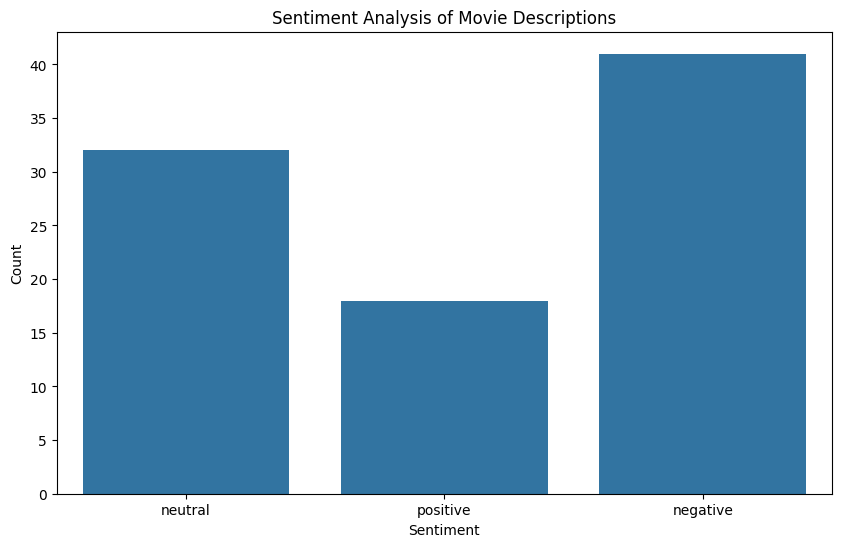

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged, x='sentiment')
plt.title('Sentiment Analysis of Movie Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count') 
plt.show()

##### Scaling down both budget and gross sales for the charts to look cleaner.
###### Suggested by Andrew McDaniel


In [23]:
merged['Budget_USD'] = merged['Budget_USD']/1_000_000
merged['Gross_Sales_USD'] = merged['Gross_Sales_USD']/100_000_000

##### Scatter plot comparing gross sales vs budget.

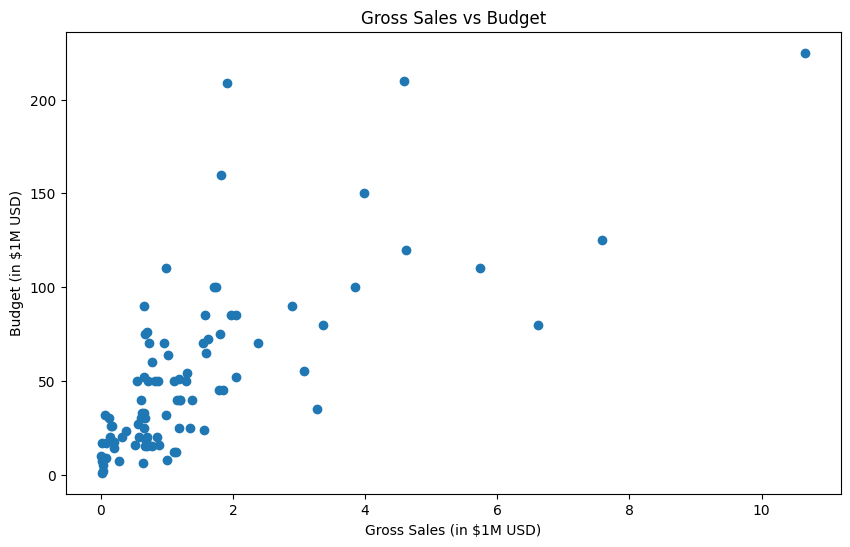

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(merged['Gross_Sales_USD'], merged['Budget_USD'])
plt.title('Gross Sales vs Budget')
plt.xlabel('Gross Sales (in $1M USD)')
plt.ylabel('Budget (in $1M USD)')
plt.show()

Text(0.5, 1.02, 'Gross Sales vs Budget with Sentiment')

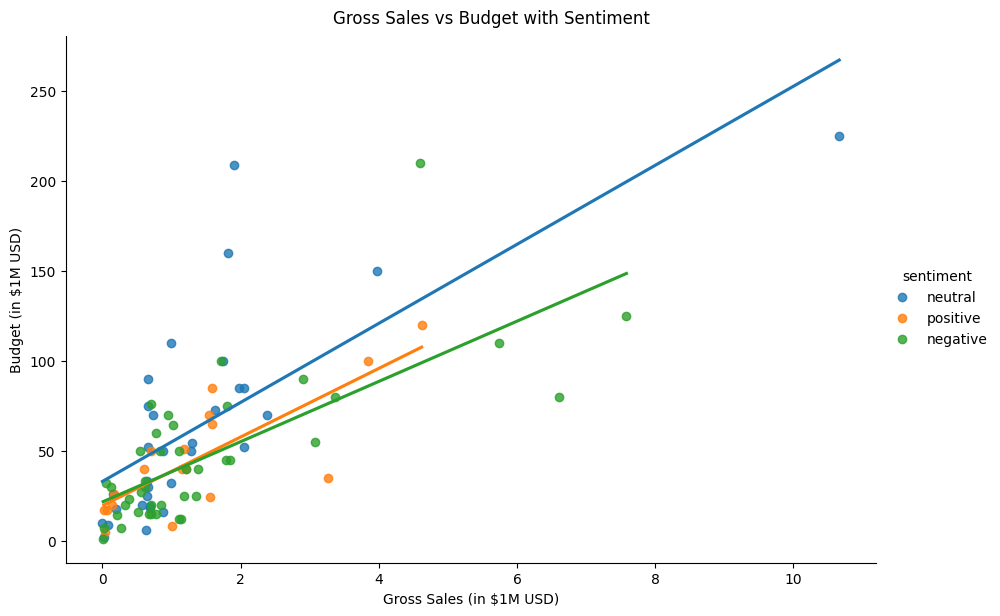

In [25]:

g= sns.lmplot(data=merged, x='Gross_Sales_USD', y='Budget_USD', hue='sentiment', height=6, aspect=1.5, ci=None)
g.set_axis_labels('Gross Sales (in $1M USD)', 'Budget (in $1M USD)')
g.figure.suptitle('Gross Sales vs Budget with Sentiment', y=1.02)



##### Using a Seaborn display plot, I'm able to show how movies compare in each sentiment with gross sales vs budget. 

Text(0.5, 1.05, 'Gross Sales vs Budget with Sentiment')

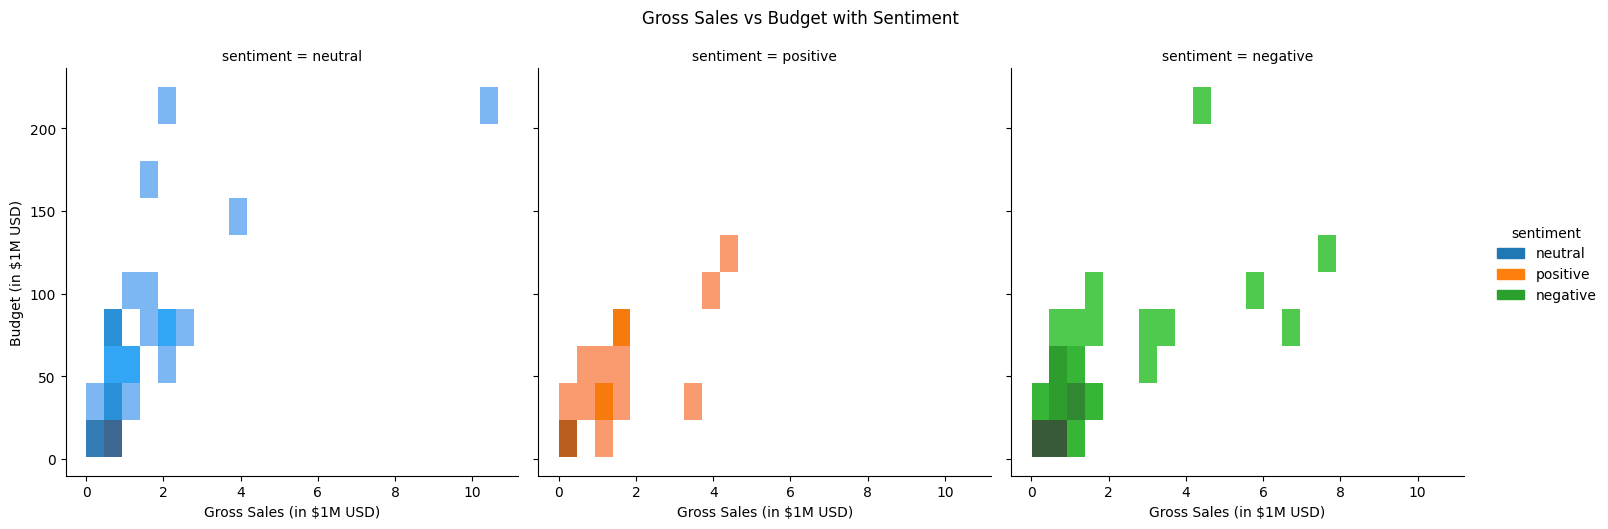

In [26]:
g = sns.displot(data=merged, x='Gross_Sales_USD', y='Budget_USD', hue='sentiment', col='sentiment')

g.set_axis_labels('Gross Sales (in $1M USD)', 'Budget (in $1M USD)')
g.figure.suptitle('Gross Sales vs Budget with Sentiment', y=1.05)


### Conclusion

##### When looking at the movies, the first thing we look at is the sentiment. The negative sentiment is about double the positive sentiment. Now when we go to look at just the budget vs gross sales, we see movies with a negative sentiment could possibly make more gross sales than movies with a positive sentiment. Budgets seemingly are higher with movies that are either neutral or negative than movies with positive sentiment. This analysis shows that movies with a negative sentiment average higher gross sales then movies with a positive sentiment until you look at the chart that has a fitted line. When looking at this, it seems like, in therory, the more the budget is, the higher gross sales might be since the slope is slightly more positive. 

##### I believe if more is spent on the movie, the better chance it has to have higher gross sales and a positive sentiment. 